<a href="https://colab.research.google.com/github/nirmal20092003/CODSOFT/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv('/content/sample_data/advertising.csv')
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Exploratory Data Analysis

In [3]:
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


Correlation heatmap

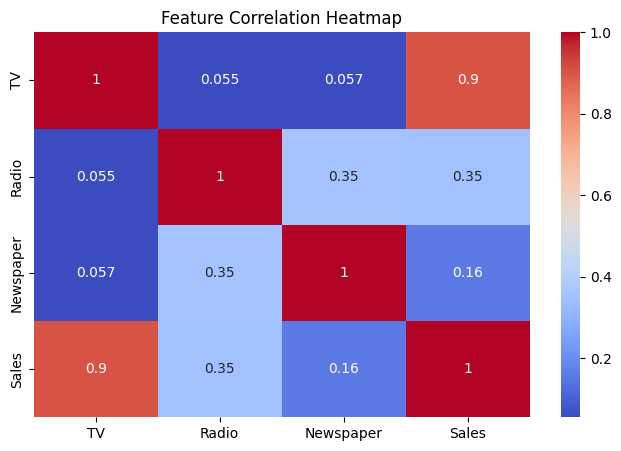

In [4]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Prepare features and labels

In [5]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

Split the dataset into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Linear Regression model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions

In [8]:
y_pred = model.predict(X_test)

 Evaluate the model

In [9]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nModel Evaluation:")
print(f"R² Score (Accuracy): {r2*100:.2f}%")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation:
R² Score (Accuracy): 90.59%
Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71


Visualize Actual vs Predicted

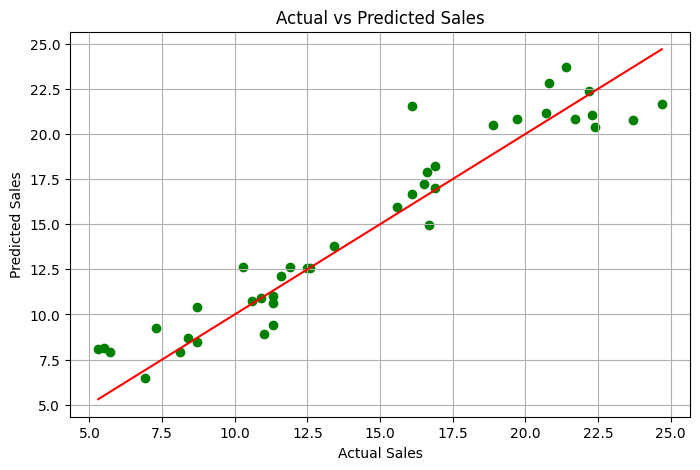

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

Input and Predict Output Section

In [12]:
print("\n Enter Advertising Spend to Predict Sales:")
tv = float(input("TV Spend: "))
radio = float(input("Radio Spend: "))
newspaper = float(input("Newspaper Spend: "))


user_input = np.array([[tv, radio, newspaper]])
predicted_sales = model.predict(user_input)
print(f"\n Predicted Sales: {predicted_sales[0]:.2f} units")


📥 Enter Advertising Spend to Predict Sales:
TV Spend: 70.6
Radio Spend: 16
Newspaper Spend: 40.8

📤 Predicted Sales: 10.35 units


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
